In [81]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor

In [103]:
run preprocessing.py

In [71]:
def add_interactions(df):
    '''
    input: dataframe
    params: creating interaction columns 
    output: dataframe with additional columns 
    
    ''' 
    df['APDGST'] = df['APD'] * df['GST']
    df['GSTWSPD'] = df['WSPD'] * df['GST']
    df['APDWSPD'] = df['APD'] * df['WSPD']

    return df

In [146]:
base = ['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST','DPD',
           'APD', 'MWD', 'PRES', 'ATMP', 'WTMP']

simple = ['WSPD', 'GST','DPD',
       'APD', 'MWD', 'PRES', 'ATMP', 'WTMP']

ultra_simple = ['APD', 'WSPD']

interaction_model = ['WSPD', 'GST','DPD',
       'APD', 'MWD', 'PRES', 'ATMP', 'WTMP','APDGST','GSTWSPD', 'APDWSPD']

full_interaction_model = ['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST','DPD',
           'APD', 'MWD', 'PRES', 'ATMP', 'WTMP','APDGST','GSTWSPD', 'APDWSPD']

simple2 = ['APDGST','GSTWSPD', 'APDWSPD']          

# adding interactions to split data 



bouy_data =add_interactions(bouy_data)
bouy_data =add_interactions(bouy_data)



# Constructiing Target and Features 

y = bouy_data['WVHT']

log_y = np.log(bouy_data['WVHT'])

X = bouy_data[interaction_model]

# splitting data for validation 

X_train,X_test, y_train, y_test = train_test_split(X,y, train_size=.70, random_state= 42)

X_train,X_test, log_y_train, log_y_test = train_test_split(X,log_y, test_size=.30, random_state= 42)



In [147]:
# Scaling  numerical variables 

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [148]:
# base linear model 

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('base model train score:{}'.format(linreg.score(X_train, y_train)))
print('base model test score:{}'.format(linreg.score(X_test, y_test)))



base model train score:0.8142692817740889
base model test score:0.8236230184256611


In [149]:
# linear model - logged target

linreg = LinearRegression()
linreg.fit(X_train, log_y_train)
print('base model train score:{}'.format(linreg.score(X_train, log_y_train)))
print('base model test score:{}'.format(linreg.score(X_test, log_y_test)))

base model train score:0.7247720166904927
base model test score:0.723811529514949


In [150]:
# scaled linear regression 

linreg = LinearRegression()
linreg.fit(X_train_scaled, log_y_train)
print('base model train score:{}'.format(linreg.score(X_train_scaled, log_y_train)))
print('base model test score:{}'.format(linreg.score(X_test_scaled, log_y_test)))

base model train score:0.7247720166904927
base model test score:0.7238115295149488


In [151]:
# Linear Regression - Scaled Data 
steps = [('std_scaler', StandardScaler()),
        ('linreg', LinearRegression())]

pipeline = Pipeline(steps)


pipeline.fit(X_train, y_train)
pipeline.score(X_test,y_test)




0.823623018425661

In [136]:
y_preds = linreg.predict(X_test)

px.scatter(x = y_test, y = y_preds, labels = {'x': 'actual', 'y': 'predicted'}, trendline = 'ols')

<AxesSubplot:>

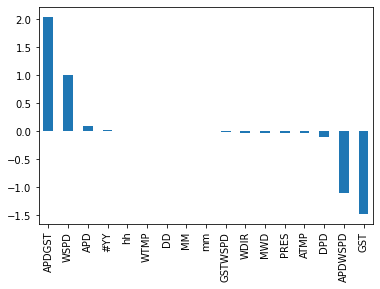

In [137]:
pd.Series(linreg.coef_, index=X_train.columns).sort_values(ascending = False).plot(kind = 'bar')

In [152]:
# random forest Regressor 

steps = [('std_scaler', StandardScaler()),
        ('rf_reg', RandomForestRegressor())]

pipeline = Pipeline(steps)


pipeline.fit(X_train, y_train)
print('random forest test score {}'.format(pipeline.score(X_test,y_test)))

y_preds_rf = pipeline.predict(X_train)


random forest test score 0.9014327225783009


In [102]:
px.scatter(x = y_preds_rf,  y= y_test,
         title = 'random Forest predictions', 
         labels = {'x': 'predicted wave height', 'y':'actual wave height'},
         trendline = 'ols')

In [127]:
pipeline.named_steps['rf_reg'].feature_importances_

array([4.75214282e-03, 9.62999878e-03, 1.40073240e-02, 6.24965213e-03,
       1.74644302e-05, 1.57860886e-02, 3.44264873e-03, 3.44525126e-03,
       1.94603793e-02, 1.37932835e-01, 1.52851174e-02, 3.04981943e-02,
       1.45036014e-02, 1.57936681e-02, 4.11549295e-01, 4.23052620e-03,
       2.93415813e-01])

In [126]:
from sklearn import tree

tree.plot_tree(pipeline.named_steps['rf_reg'].estimators_[0], feature_names= X_train.columns)

[Text(247.43008445764661, 214.0425, 'APDWSPD <= 0.874\nmse = 0.403\nsamples = 9103\nvalue = 1.174'),
 Text(184.693717996491, 207.2475, 'APDGST <= -0.025\nmse = 0.162\nsamples = 7653\nvalue = 0.985'),
 Text(136.27687486439635, 200.4525, 'APD <= 1.341\nmse = 0.106\nsamples = 5314\nvalue = 0.843'),
 Text(96.33025523607117, 193.6575, 'APDGST <= -0.429\nmse = 0.073\nsamples = 4857\nvalue = 0.806'),
 Text(45.36951147362292, 186.8625, 'APD <= -0.511\nmse = 0.065\nsamples = 3133\nvalue = 0.743'),
 Text(23.10576474027232, 180.0675, 'APDWSPD <= -0.636\nmse = 0.028\nsamples = 1130\nvalue = 0.632'),
 Text(14.34157372557702, 173.2725, 'DPD <= -0.263\nmse = 0.023\nsamples = 659\nvalue = 0.584'),
 Text(7.957580118447999, 166.4775, 'APD <= -1.0\nmse = 0.023\nsamples = 413\nvalue = 0.626'),
 Text(3.000606077378646, 159.6825, 'DPD <= -1.467\nmse = 0.013\nsamples = 202\nvalue = 0.565'),
 Text(0.9946975148059999, 152.8875, 'PRES <= 0.639\nmse = 0.008\nsamples = 59\nvalue = 0.487'),
 Text(0.636032545524990

Error in callback <function flush_figures at 0x7fd8a8c2d8b0> (for post_execute):


KeyboardInterrupt: 

In [125]:
pipeline.named_steps['rf_reg'].estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=680770593)